In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 데이터셋 디렉터리 경로
dataset_dir = 'D:/Recycling_Keras/dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 300
image_height = 300

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 15492 images belonging to 5 classes.
Found 1934 images belonging to 5 classes.
Found 1941 images belonging to 5 classes.


In [3]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [4]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(32, 300, 300, 3)

In [5]:
data_batch[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

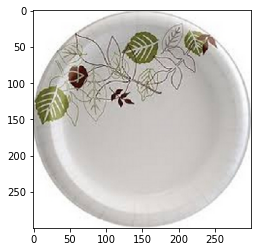

In [6]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [7]:
# 첫 번째 라벨 배치 출력
labels_batch[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [8]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4}

In [9]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic', 4: 'trash'}

In [10]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'trash'

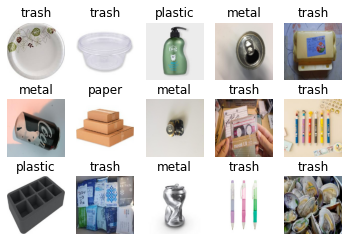

In [11]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [12]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))  

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

In [13]:
model = build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 156800)            0

In [15]:
# 훈련 시작
history = model.fit_generator(train_generator,
                              steps_per_epoch=15492 / 32,
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=1934 / 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
485/484 [==============================] - 1247s 3s/step - loss: 1.5015 - accuracy: 0.3632 - val_loss: 1.4072 - val_accuracy: 0.4209
Epoch 2/200
485/484 [==============================] - 1242s 3s/step - loss: 1.3150 - accuracy: 0.4520 - val_loss: 1.2837 - val_accuracy: 0.4654
Epoch 3/200
485/484 [==============================] - 1242s 3s/step - loss: 1.1021 - accuracy: 0.5522 - val_loss: 1.3126 - val_accuracy: 0.4860
Epoch 4/200
485/484 [==============================] - 1243s 3s/step - loss: 0.8346 - accuracy: 0.6770 - val_loss: 1.2990 - val_accuracy: 0.5228
Epoch 5/200
485/484 [==============================] - 1243s 3s/step - loss: 0.5549 - accuracy: 0.7916 - val_loss: 1.5344 - val_accuracy: 0.5207
Epoch 6/200
485/484 [==============================] - 1244s 3s/step - loss: 0.3610 - accuracy: 0.8686 - val_loss: 1.8583 - val_accuracy: 0.5238
Epoch 7/200
485/484 [==============================] -

485/484 [==============================] - 1244s 3s/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 4.2802 - val_accuracy: 0.5450
Epoch 56/200
485/484 [==============================] - 1243s 3s/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 4.2029 - val_accuracy: 0.5414
Epoch 57/200
485/484 [==============================] - 1262s 3s/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 4.6119 - val_accuracy: 0.5408
Epoch 58/200
485/484 [==============================] - 1273s 3s/step - loss: 0.0224 - accuracy: 0.9940 - val_loss: 4.4567 - val_accuracy: 0.5403
Epoch 59/200
485/484 [==============================] - 1272s 3s/step - loss: 0.0254 - accuracy: 0.9934 - val_loss: 4.0935 - val_accuracy: 0.5367
Epoch 60/200
485/484 [==============================] - 1245s 3s/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 4.4021 - val_accuracy: 0.5502
Epoch 61/200
485/484 [==============================] - 1243s 3s/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 4.1997 - val_accuracy

485/484 [==============================] - 1247s 3s/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 4.8395 - val_accuracy: 0.5522
Epoch 112/200
485/484 [==============================] - 1244s 3s/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 4.6474 - val_accuracy: 0.5383
Epoch 113/200
485/484 [==============================] - 1244s 3s/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 4.8130 - val_accuracy: 0.5615
Epoch 114/200
485/484 [==============================] - 1245s 3s/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 5.7236 - val_accuracy: 0.5440
Epoch 115/200
485/484 [==============================] - 1244s 3s/step - loss: 0.0164 - accuracy: 0.9964 - val_loss: 4.3203 - val_accuracy: 0.5517
Epoch 116/200
485/484 [==============================] - 1244s 3s/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 4.4481 - val_accuracy: 0.5388
Epoch 117/200
485/484 [==============================] - 1246s 3s/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 4.7183 - val_ac

Epoch 167/200
485/484 [==============================] - 1120s 2s/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 4.0488 - val_accuracy: 0.5434
Epoch 168/200
485/484 [==============================] - 1118s 2s/step - loss: 0.0127 - accuracy: 0.9970 - val_loss: 5.3064 - val_accuracy: 0.5383
Epoch 169/200
485/484 [==============================] - 1122s 2s/step - loss: 0.0202 - accuracy: 0.9946 - val_loss: 5.2400 - val_accuracy: 0.5300
Epoch 170/200
485/484 [==============================] - 1121s 2s/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 4.8572 - val_accuracy: 0.5419
Epoch 171/200
485/484 [==============================] - 1121s 2s/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 5.0285 - val_accuracy: 0.5543
Epoch 172/200
485/484 [==============================] - 1119s 2s/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 5.1065 - val_accuracy: 0.5502
Epoch 173/200
485/484 [==============================] - 1121s 2s/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 4

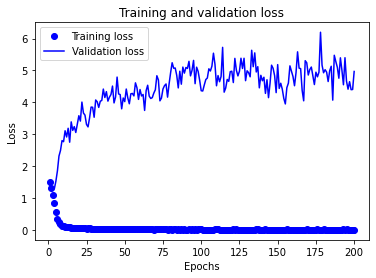

In [16]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

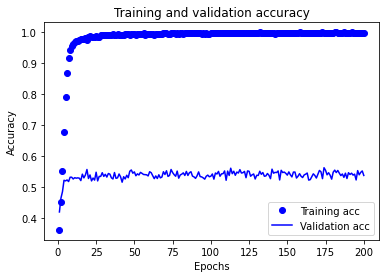

In [18]:
acc = history.history['accuracy']           # 훈련 정확도
val_acc = history.history['val_accuracy']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
# 모델 저장
model.save('./model/image_cnn_model.h5')

In [20]:
# 저장된 모델 파일 로드
model = models.load_model('./model/image_cnn_model.h5')

In [21]:
# 테스트셋 평가
results = model.evaluate_generator(test_generator)
results

Instructions for updating:
Please use Model.evaluate, which supports generators.


[4.966322898864746, 0.5244719386100769]

In [22]:
# 테스트셋 예측
results = model.predict_generator(test_generator)
results

Instructions for updating:
Please use Model.predict, which supports generators.


array([[2.8058406e-07, 1.1317770e-09, 3.4205845e-04, 1.6673297e-12,
        9.9965763e-01],
       [1.3401457e-06, 9.9998903e-01, 5.2313635e-06, 1.2437124e-06,
        3.2640271e-06],
       [3.8133907e-10, 1.0000000e+00, 7.2420536e-10, 8.5135329e-11,
        1.0711297e-08],
       ...,
       [7.2293454e-01, 4.1960152e-03, 2.2442992e-01, 1.5676629e-03,
        4.6871830e-02],
       [1.1692591e-26, 2.0791657e-25, 1.0000000e+00, 7.9215448e-18,
        5.2583939e-20],
       [9.9481517e-01, 9.2451158e-04, 3.4618253e-05, 8.0614188e-04,
        3.4195173e-03]], dtype=float32)

In [23]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results

array([4, 1, 1, ..., 0, 2, 0], dtype=int64)

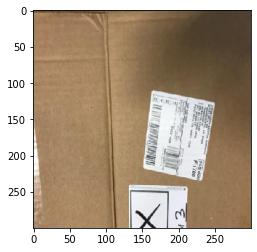

In [24]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [25]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]

'paper'